<a href="https://colab.research.google.com/github/katiacardoso/Selector_Hat/blob/main/SelectorHat_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testar o balanceamento

In [ ]:
from pickle import DEFAULT_PROTOCOL
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Definindo as características
caracteristicas = ["habilidade", "interesse", "personalidade"]

# Gerando 100 alunos aleatórios
alunos = []
for _ in range(100000):
    habilidade = np.random.choice(["inteligente", "médio", "fraco"])
    interesse = np.random.choice(["leitura", "escrita", "música", "artes", "esportes", "ciência"])
    personalidade = np.random.choice(["extrovertido", "introvertido", "assertivo", "cooperativo"])
    casa = np.random.choice(["Grifinória", "Lufa-Lufa", "Corvinal", "Sonserina"])
    alunos.append({
        "habilidade": habilidade,
        "interesse": interesse,
        "personalidade": personalidade,
        "casa": casa,
    })

# Convertendo o DataFrame em um array 2D
df = pd.DataFrame(alunos, columns=caracteristicas + ["casa"])

# Salvar o DataFrame como um arquivo CSV
df.to_csv('alunos.csv', index=False)

# Contando o número de dados de cada classe (altere para qual desejar)
contagem_de_classes = df["casa"].value_counts()

# Imprimindo o resultado
print(contagem_de_classes)

# Criando e ajustando os objetos LabelEncoder para cada característica
le_habilidade = LabelEncoder()
le_interesse = LabelEncoder()
le_personalidade = LabelEncoder()

le_habilidade.fit(df['habilidade'])
le_interesse.fit(df['interesse'])
le_personalidade.fit(df['personalidade'])

# Convertendo as características strings usando LabelEncoder
df['habilidade'] = le_habilidade.transform(df['habilidade'])
df['interesse'] = le_interesse.transform(df['interesse'])
df['personalidade'] = le_personalidade.transform(df['personalidade'])

# Treinando o modelo
modelo = GaussianNB()
modelo.fit(df[caracteristicas], df["casa"])

# Classificando um novo aluno
novo_aluno = {
    "habilidade": "médio",
    "interesse": "leitura",
    "personalidade": "extrovertido",
}

# Transformando as características do novo aluno usando os LabelEncoders apropriados
habilidade_encoded = le_habilidade.transform([novo_aluno['habilidade']])[0]
interesse_encoded = le_interesse.transform([novo_aluno['interesse']])[0]
personalidade_encoded = le_personalidade.transform([novo_aluno['personalidade']])[0]

# Prevendo a casa do novo aluno
previsao = modelo.predict([[habilidade_encoded, interesse_encoded, personalidade_encoded]])

# Convertendo o resultado de volta para a categoria original usando o LabelEncoder
casa_referente = previsao[0]
print("Casa prevista",casa_referente)

# Obtendo a probabilidade de erro
probabilidade_de_erro = 1 - modelo.score(df[caracteristicas], df["casa"])
print("Probabilidade de erro:", probabilidade_de_erro)


# Obtendo a probabilidade de acerto
probabilidade_de_acerto = modelo.score(df[caracteristicas], df["casa"])
print("Probabilidade de acerto:", probabilidade_de_acerto)


Corvinal      25141
Lufa-Lufa     25010
Grifinória    24953
Sonserina     24896
Name: casa, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Casa prevista Corvinal
Probabilidade de erro: 0.74676
Probabilidade de acerto: 0.25324
Grifinória    25035
Corvinal      25011
Lufa-Lufa     24991
Sonserina     24963
Name: casa, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Casa prevista Corvinal
Probabilidade de erro: 0.74525
Probabilidade de acerto: 0.25475


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df[caracteristicas], df["casa"], test_size=0.2, random_state=42)

# Criando e ajustando os objetos LabelEncoder para cada característica
le_habilidade = LabelEncoder()
le_interesse = LabelEncoder()
le_personalidade = LabelEncoder()

le_habilidade.fit(df['habilidade'])
le_interesse.fit(df['interesse'])
le_personalidade.fit(df['personalidade'])


# Convertendo as características strings usando LabelEncoder
X_train['habilidade'] = le_habilidade.transform(X_train['habilidade'])
X_train['interesse'] = le_interesse.transform(X_train['interesse'])
X_train['personalidade'] = le_personalidade.transform(X_train['personalidade'])

X_test['habilidade'] = le_habilidade.transform(X_test['habilidade'])
X_test['interesse'] = le_interesse.transform(X_test['interesse'])
X_test['personalidade'] = le_personalidade.transform(X_test['personalidade'])

# Criando e ajustando o modelo com os dados de treinamento
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Fazendo previsões para os dados de treinamento e teste
previsoes_treino = modelo.predict(X_train)
previsoes_teste = modelo.predict(X_test)

# Criando relatórios de classificação separados para treinamento e teste
relatorio_treino = classification_report(y_train, previsoes_treino, target_names=df['casa'].unique())
relatorio_teste = classification_report(y_test, previsoes_teste, target_names=df['casa'].unique())

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular a acurácia
acuracia_treino = accuracy_score(y_train, previsoes_treino)
print(f'Acurácia Treino: {acuracia_treino}')
acuracia_teste = accuracy_score(y_test, previsoes_teste)
print(f'Acurácia Teste: {acuracia_teste}')

# Mostrar a matriz de confusão
matriz_confusao_treino = confusion_matrix(y_train, previsoes_treino)
print(f'Matriz de Confusão Treino:\n{matriz_confusao_treino}')
matriz_confusao_teste = confusion_matrix(y_test, previsoes_teste)
print(f'Matriz de Confusão Teste:\n{matriz_confusao_teste}')


# Exibindo os relatórios de classificação
print("Relatório de Classificação para Dados de Treinamento:\n", relatorio_treino)
print("Relatório de Classificação para Dados de Teste:\n", relatorio_teste)



Acurácia Treino: 0.2570375
Acurácia Teste: 0.2412
Matriz de Confusão Treino:
[[11112  6059  1908  1082]
 [10625  6300  1933  1104]
 [10901  5954  2024  1100]
 [10773  6070  1928  1127]]
Matriz de Confusão Teste:
[[2605 1597  498  280]
 [2743 1467  501  280]
 [2697 1572  482  280]
 [2633 1543  552  270]]
Relatório de Classificação para Dados de Treinamento:
               precision    recall  f1-score   support

   Sonserina       0.26      0.55      0.35     20161
  Grifinória       0.26      0.32      0.28     19962
   Lufa-Lufa       0.26      0.10      0.15     19979
    Corvinal       0.26      0.06      0.09     19898

    accuracy                           0.26     80000
   macro avg       0.26      0.26      0.22     80000
weighted avg       0.26      0.26      0.22     80000

Relatório de Classificação para Dados de Teste:
               precision    recall  f1-score   support

   Sonserina       0.24      0.52      0.33      4980
  Grifinória       0.24      0.29      0.26    

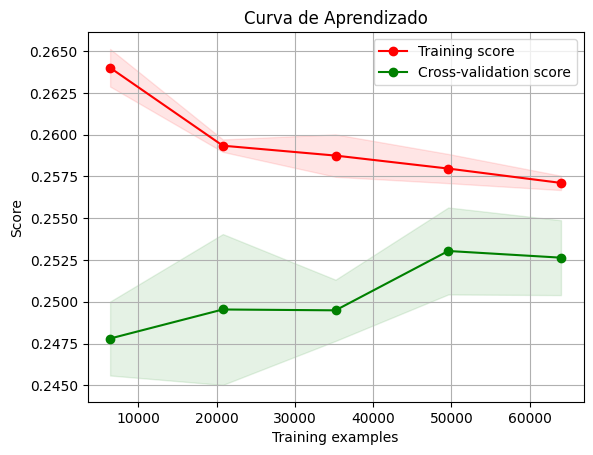

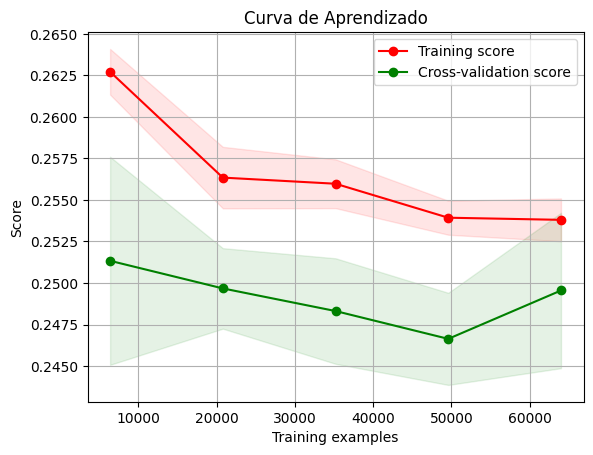

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotando a curva de aprendizado
plot_learning_curve(modelo, "Curva de Aprendizado", X_train, y_train, cv=5)
plt.show()
